## ETF price-volume relationship  

To compare the difference between industries, we selected 6 sectors.  
Heavy Industry: XLI  
Retail: RTH  
Medical & Health: XLV  
Technology: XLK 
Energy: XLE  
Financial: XLF  
Market: SPY  

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('industry_etf.csv')
df1.rename(columns={'Attributes':'Date'}, inplace=True)
df1 = df1.drop(index=1)
df1.set_index('Date', inplace=True)
df1.head()

,open,open.1,open.2,open.3,open.4,open.5,open.6,open.7,open.8,open.9,...,volume.14,volume.15,volume.16,volume.17,volume.18,volume.19,volume.20,volume.21,volume.22,volume.23
Date,,,,,,,,,,,,,,,,,,,,,
Symbols,DIA,IBB,IHE,ITA,ITB,IWM,IYC,IYR,IYT,IYZ,...,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
2015-05-01,163.1623,112.1416,159.572,116.0162,25.4884,114.6117,137.3856,64.0702,146.8248,27.9606,...,6020645,6749902,11354599,18331079,11017898,10548396,5158317,12507400,11508332,6110220
2015-05-04,164.1911,114.1163,161.801,116.2851,25.9207,115.1871,139.4599,64.7752,149.2922,27.9878,...,3616168,4150209,14434247,22232282,6096265,7698750,6710241,13323122,8561748,3920894
2015-05-05,164.0909,113.9607,162.4527,116.4195,25.7635,115.3946,139.1238,64.4694,148.9861,27.8426,...,4608939,3761331,16076343,30639814,10026905,8104890,6537353,18621205,11373760,7856800
2015-05-06,163.7631,113.1596,160.9226,115.5745,25.6161,114.2251,137.7025,63.2378,147.4656,27.5251,...,3936545,5015558,16388582,29753265,8247719,9873883,6233272,16976140,10152164,8298192


In [3]:
#set plot type
plt.rcParams['figure.figsize'] = (18, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False #show minus

In [4]:
sel_etf = [18,11,22,19,16,17,13] #selected ETF(Heavy Industry,Retail, Medical & Health, Tech, Energy, Financial, Market)
def plot(t): #2 types
    for i in sel_etf:
        fig=plt.figure()
        
        i = str(i)
        plt.title(df1['close.'+i][0])
        
        close = df1['close.'+i][1:].astype(float)
        volume = df1['volume.'+i][1:].astype(float)
        volatility = close.pct_change().rolling(14).std()
        
        if t == 'n':
            color = 'forestgreen'
            print(df1['close.'+i][0]+'  close&volume corr  '+str(close.corr(volume))+'  close_volatility&volume corr  '+str(volatility.corr(volume[7:])))
            
        if t == 'pct':
            close = close.pct_change()
            volume = volume.pct_change()
            color = 'orangered'
            range_c = close.max() - close.min()
            range_v = volume.max() - volume.min()
            print(df1['close.'+i][0]+'  close_pct&volume_pct corr  '+str(close.corr(volume))+'  close_range  '+str(range_c)+'  volume_range  '+str(range_v))
            
        close.plot(label='close',color='steelblue')    
        volume.plot(label='volume', secondary_y=True, color=color)
        
        handles,labels = [],[]
        for ax in fig.axes:
            for h,l in zip(*ax.get_legend_handles_labels()):
                handles.append(h)
                labels.append(l)

        plt.legend(handles,labels,loc=9)
        if t == 'n':
            fig=plt.figure(figsize=(18,2))
            plt.title('volatility 7d')
            volatility.plot(color='darkorange')

XLI  close&volume corr  -0.02218656478925475  close_volatility&volume corr  0.2566316603876101
RTH  close&volume corr  -0.1876342762972083  close_volatility&volume corr  0.13237686944872062
XLV  close&volume corr  -0.19802873219196737  close_volatility&volume corr  0.5013340959465252
XLK  close&volume corr  0.22942736492428906  close_volatility&volume corr  0.4448990730517774
XLE  close&volume corr  -0.48574232366886555  close_volatility&volume corr  0.5876428192550867
XLF  close&volume corr  0.15424811717303574  close_volatility&volume corr  0.2879875980906332
SPY  close&volume corr  -0.3323424612003949  close_volatility&volume corr  0.5462232793450541


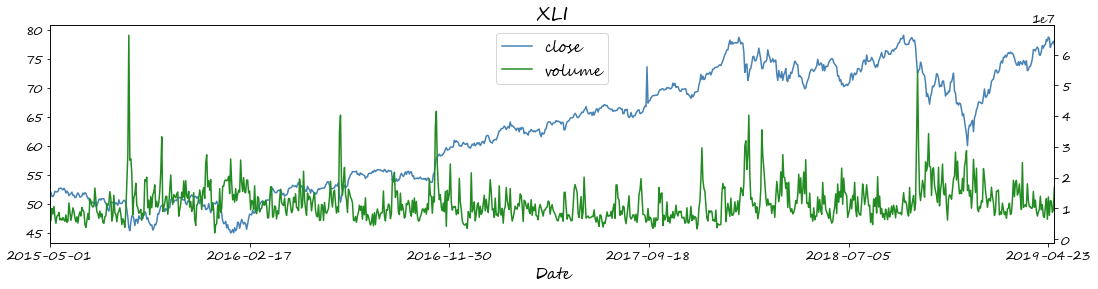

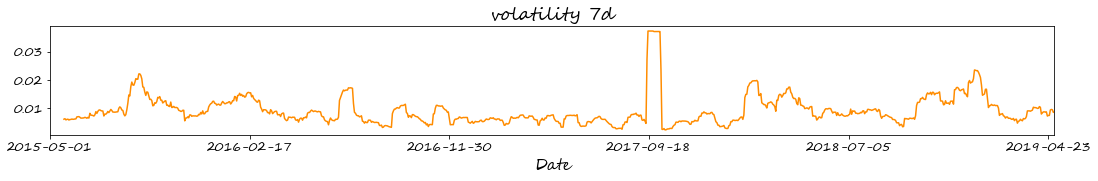

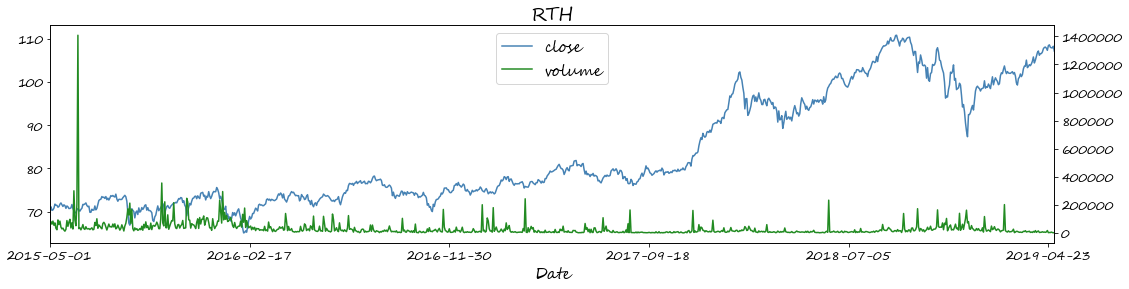

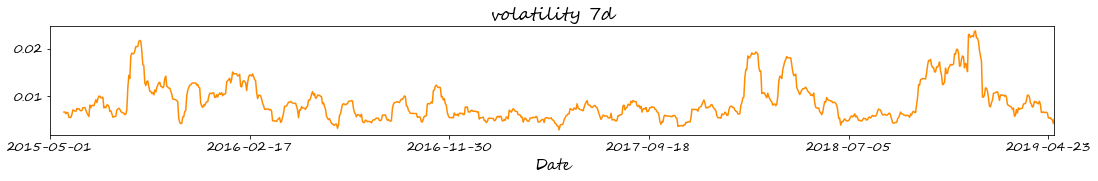

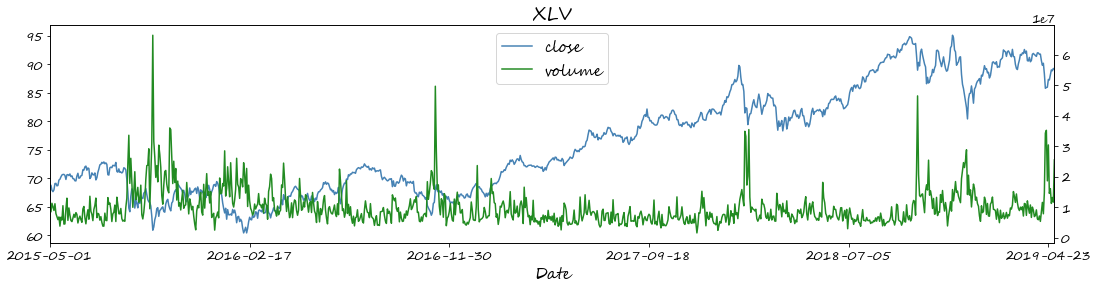

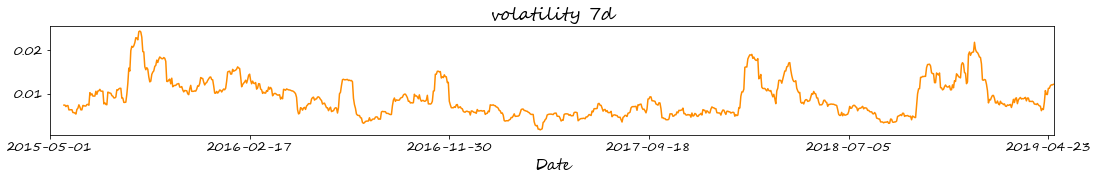

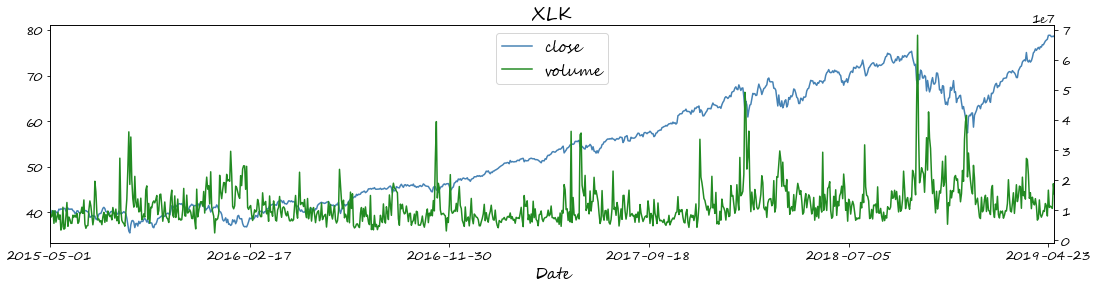

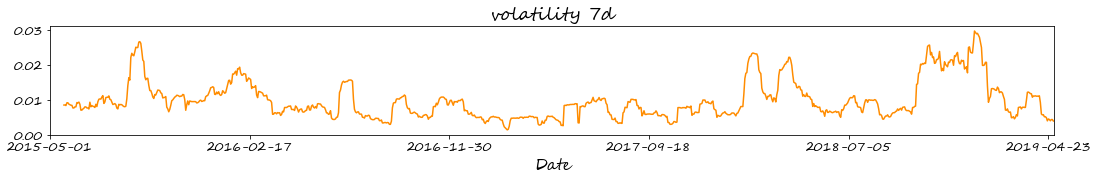

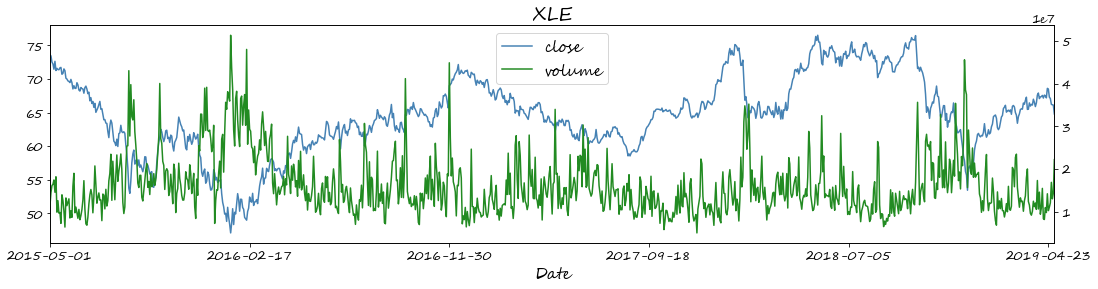

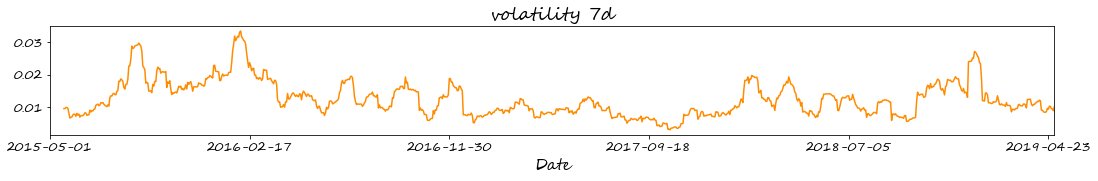

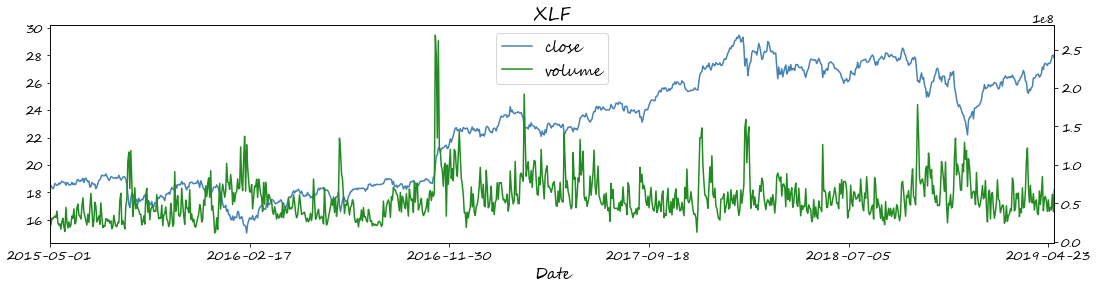

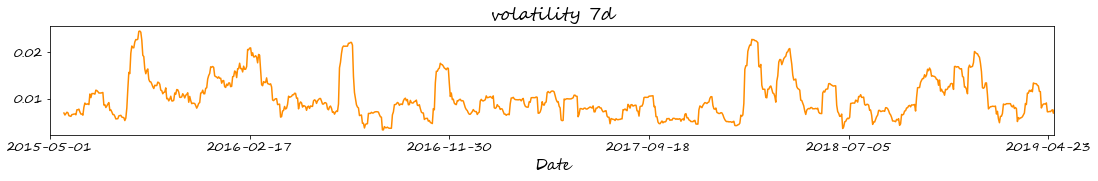

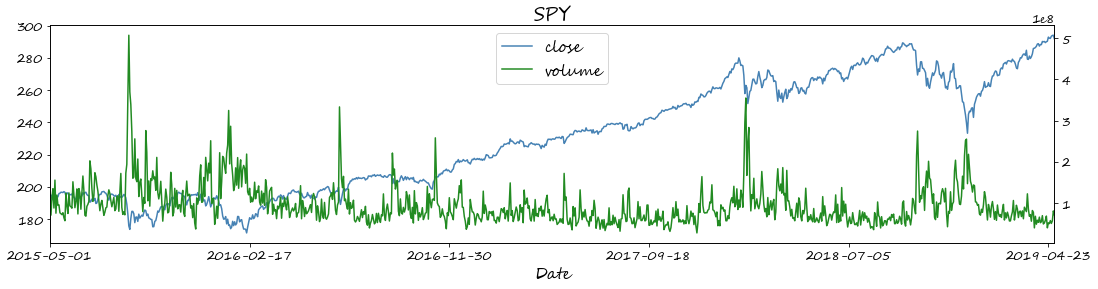

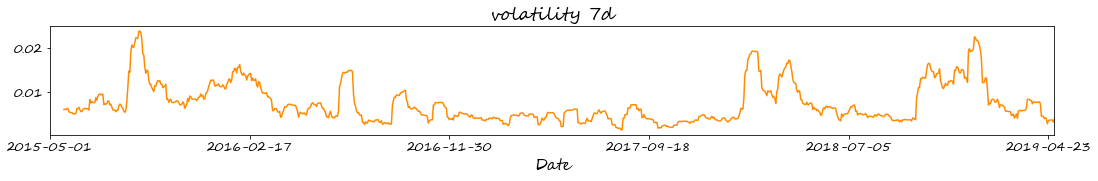

In [5]:
plot('n')

XLI  close_pct&volume_pct corr  -0.19733306517674867  close_range  0.18848182367191124  volume_range  3.7413437338152167
RTH  close_pct&volume_pct corr  -0.0086318929673905  close_range  0.09895817901719406  volume_range  67.67088521226422
XLV  close_pct&volume_pct corr  -0.1847937924974436  close_range  0.08792681983843409  volume_range  3.2282765048993207
XLK  close_pct&volume_pct corr  -0.18793717754717437  close_range  0.11086374367775298  volume_range  5.771421717105652
XLE  close_pct&volume_pct corr  -0.041991115243228204  close_range  0.11592294833851713  volume_range  2.5792069233820683
XLF  close_pct&volume_pct corr  -0.11153421061803034  close_range  0.09885093542050427  volume_range  3.9244278326813893
SPY  close_pct&volume_pct corr  -0.28204703833378775  close_range  0.09234746628719304  volume_range  2.9658530202639115


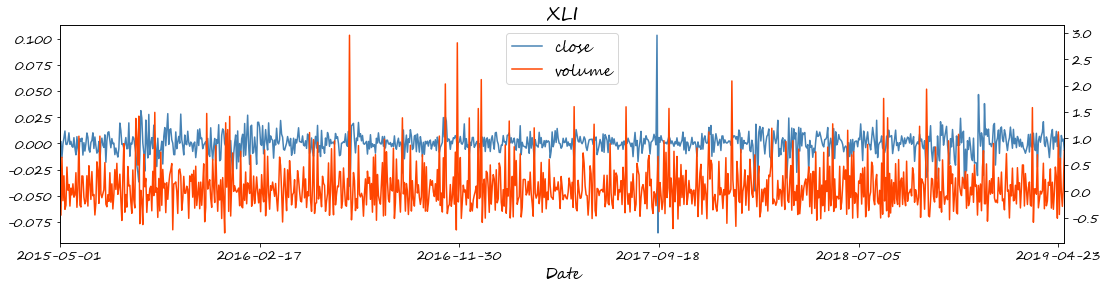

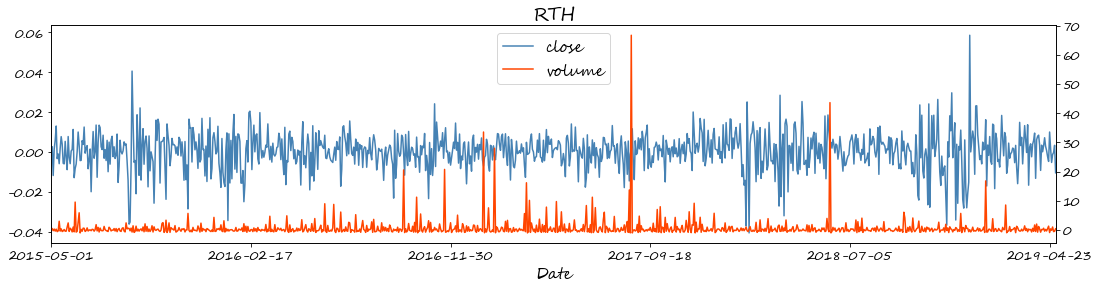

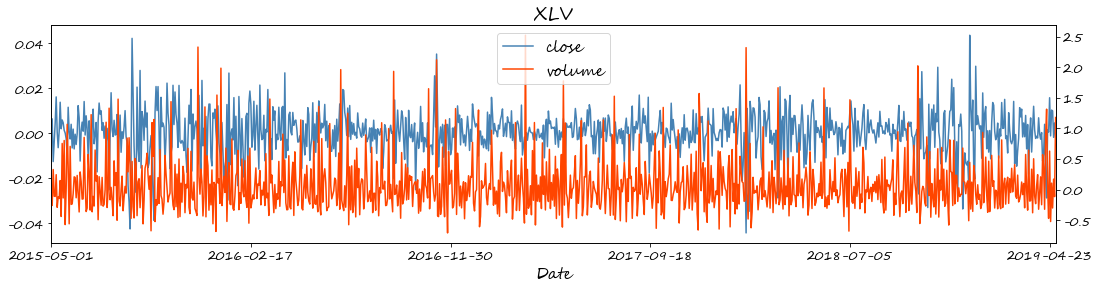

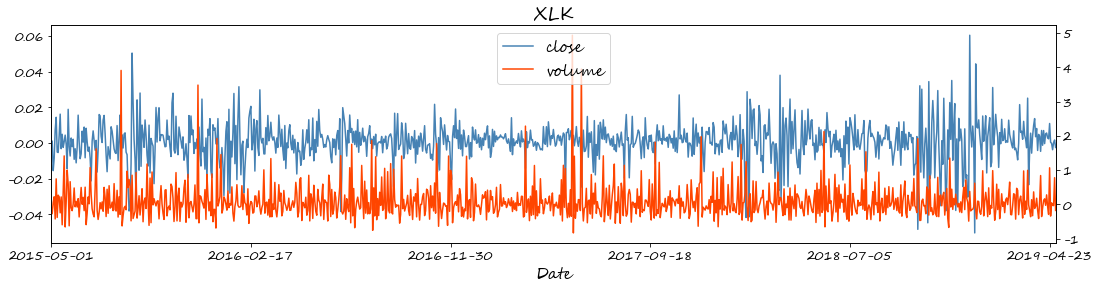

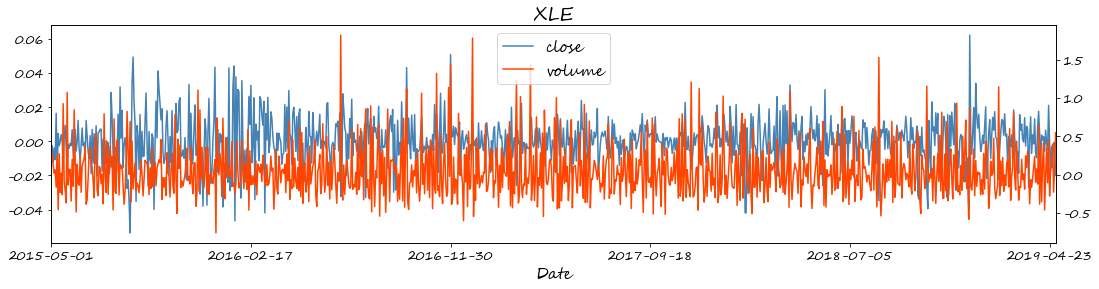

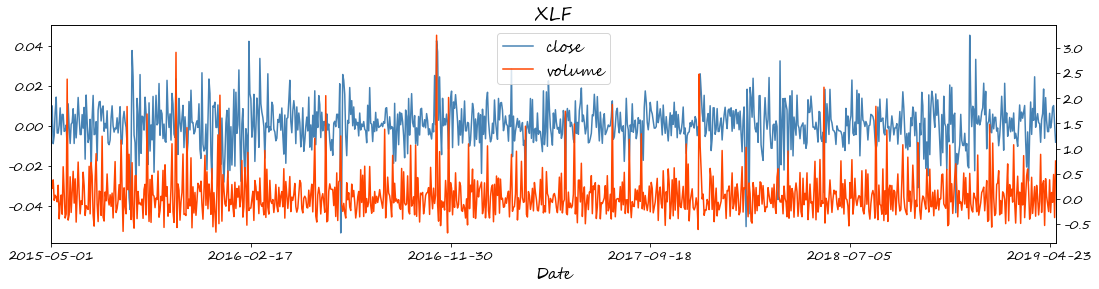

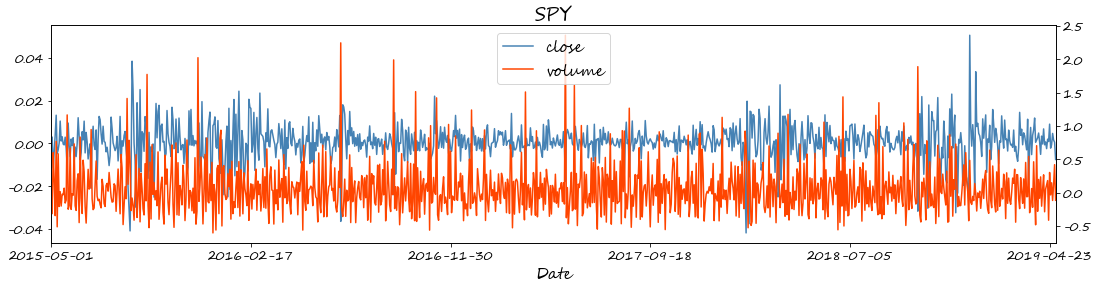

In [6]:
plot('pct')

In [7]:
#volatility
for i in sel_etf:
    volatility = df1['close.'+str(i)][1:].astype(float).pct_change().rolling(7).std()
    print(df1['close.'+str(i)][0]+'  '+str(volatility.mean()))

XLI  0.00885186812902059
RTH  0.008326790280475917
XLV  0.008630002375035752
XLK  0.009494263267267182
XLE  0.012184479618748693
XLF  0.009767910901323567
SPY  0.007204187586326416


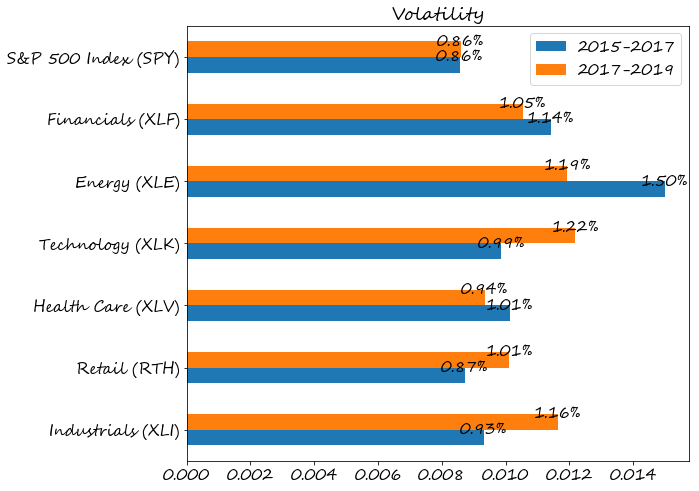

In [50]:
import math
etf_sym = ['Industrials (XLI)','Retail (RTH)','Health Care (XLV)',
           'Technology (XLK)','Energy (XLE)','Financials (XLF)', 'S&P 500 Index (SPY)']
vol_1 = [] # 2015-2017 volatitlity
vol_2 = [] # 2017-2019 volatitlity
for i in sel_etf:
    d = {'log_': np.log(df1['close.'+str(i)][1:].astype(float)/df1['close.'+str(i)][1:].astype(float).shift(1))}
    vol = pd.DataFrame(data=d)

    vol['log_roll'] = vol['log_'].rolling(7).std()
    vol['annual'] = vol['log_roll']*math.sqrt(255)
    
    vol_1.append(vol['log_'].loc['2015-05-04':'2017-05-04'].std())
    vol_2.append(vol['log_'].loc['2017-05-04':'2019-05-04'].std())

df_v = pd.DataFrame({'2015-2017': vol_1, '2017-2019': vol_2}, index=etf_sym)
ax = df_v.plot.barh(figsize=(9,8),fontsize=15,title='Volatility')

# add annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+p.get_height(),
             '{:.2%}'.format(width),ha='center', va='center')

[164.2821 162.9802 162.4157 ... 264.7806 265.1298 263.4939] [3256866. 5316273. 7534180. ... 1522458. 2259245. 2902461.]
[ 3.25686600e+06 -2.05940700e+06 -9.59358700e+06 ...  1.23867195e+08
  1.26126440e+08  1.23223979e+08]
                0
0       3256866.0
1      -2059407.0
2      -9593587.0
3      -5450800.0
4         78786.0
5      -3674775.0
6      -8417571.0
7      -4566188.0
8        355242.0
9       4877393.0
10      7767896.0
11     10534483.0
12      5453707.0
13      8177938.0
14      5820913.0
15       291219.0
16      3879371.0
17       218520.0
18     -4705130.0
19      -356114.0
20     -5462352.0
21        19592.0
22     -7292862.0
23    -12521597.0
24    -16902138.0
25    -21624561.0
26    -16143703.0
27    -12428901.0
28    -16995651.0
29    -22498317.0
...           ...
976    98346224.0
977   102146234.0
978    95919745.0
979   100902199.0
980   104180917.0
981   101014763.0
982   103449142.0
983   107705001.0
984   113756712.0
985   111436664.0
986   114702192.0
987

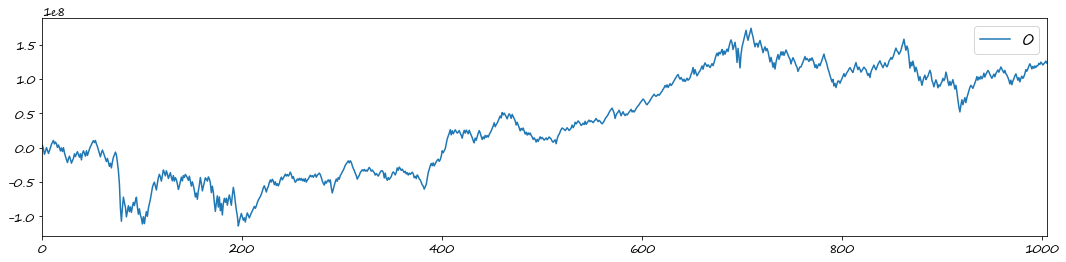

In [9]:
import talib as ta
import numpy as np
close = np.array(df1['close'][2:],dtype='float')
volume = np.array(df1['volume'][2:],dtype='float')
print(close,volume)
OBV = ta.OBV(close, volume)
print(OBV)
OBV = pd.DataFrame(OBV)
print(OBV)
OBV.plot()

#### Price Volume Trend(PVT) indicator  
* PVT(today) = Change * Volume(today) + PVT(yesterday)  
Change = (Close(today) - Close(yesterday)/Close(yesterday))  

In [10]:
close = df1['close'][2:].astype('float').reset_index()
volume = df1['volume'][2:].astype('float').reset_index()
data = pd.concat([close,volume], axis=1)

change_ = []
pvt_ = []

def pvt():
    for i in data['close'].index:
        
        if i == 0:
            pyes = data['volume'][i]
            pvt_.append(pyes)
            print(pyes)
            ch = 0
        else:
            ch = (data['close'][i] - data['close'][i-1])/data['close'][i-1]
            p = ch*data['volume'][i] + pyes
            print(pyes)
            pvt_.append(p)
            pyes = p
            
        change_.append(ch)
pvt()
data['change'] = change_
data['pvt'] = pvt_
data.head()

3256866.0
3256866.0
3214735.689888916
3188640.2217891095
3209308.792044941
3288573.892720078
3272681.442340833
3263251.3606690634
3263890.3826270425
3312630.884752959
3321136.7486951808
3324304.890262457
3328092.3891130122
3321980.265267326
3323173.121065729
3316339.018160032
3258995.865944237
3281874.5552055994
3277235.2452167566
3245187.940704449
3252190.0109545705
3245114.2477645096
3267328.0654353187
3199815.593789701
3179098.6462869034
3162165.4955867655
3159510.969096971
3231988.8732253225
3243954.119541481
3205780.5338356714
3174138.100226617
3194562.579473138
3200061.6351937396
3267503.1213129335
3243614.493384536
3269739.1331699435
3273185.002464344
3232313.352721367
3217052.2640861096
3230099.829267749
3056919.3446688876
3066297.3672401584
3103456.939263406
3095548.509527828
3087714.7111965427
3129565.7185065
3028155.339217269
3034959.892819737
3090216.881555781
3138036.544389254
3149243.3973079664
3149433.4351812354
3159532.32406972
3154066.299614635
3156527.5921852966
31086

1304768.3701320188
1311678.3034859376
1309407.466148854
1300920.1728745112
1329532.3399101156
1327516.2014194895
1325153.7643382414
1324418.7737316187
1251360.4229475595
1252494.2231044974
1250633.447705531
1239632.5866311402
1228108.7258860157
1254312.9923156167
1249367.4096102307
1258343.9525257398
1245824.5020513034
1243888.0404610678
1248843.6755162233
1241087.6415670984
1244023.141740506
1243137.8310809508
1243254.5204438102
1242233.4687018935
1235254.2039968024
1212467.0302417784
1232379.8718290066
1219173.8699438022
1197543.6432564352
1232699.5170541762
1228745.26921049
1262162.698585118
1300799.5195798117
1297929.582376751
1298768.0644293756
1294338.2263425407
1292894.9595038055
1294261.7653538052
1295048.973978187
1294669.999419574
1299311.0047860078
1300963.0412574667
1298719.096389668
1297788.4993994494
1294833.6613339453
1292801.2314718438
1300805.9684058065
1300972.2568855677
1206204.4850365038
1221996.8042352265
1255619.5835077758
1265132.78875802
1272921.6250638054
12845

6967.911574260615
-173.66717187234826
-6469.881294379195
9696.965482969721
-29943.805775057914
-30677.81290044841
-47150.8880117581
-80067.62731548463
-82224.8664701124
-38204.16996261088
-61234.53762483434
-30529.798107860184
-28012.439276291738
-5903.933932310207
1106.2242577052293
-916.7655169858531
-27834.05232859316
5988.5358095547235
-104830.937483103
-102680.54901546783
-84813.49784842975
-89134.18064366833
-79914.26155730837
-45977.133498159405
30155.257143274728
23966.267623345866
27834.06559056774
57706.761566040135
62191.753271111214
50692.04257213953
23655.440272758424
24896.448813832587
22807.84198938441
57487.60515855861
55331.07205992643
62251.630071606174
62251.630071606174
77836.38679248303
74876.97311458236
92958.40236163499
88966.04815174475
76766.33927044184
82533.41225141103
83106.89172272905
86086.4466976781


,Date,close,Date,volume,change,pvt
0,2015-05-04,164.2821,2015-05-04,3256866.0,0.000000,3.256866e+06
1,2015-05-05,162.9802,2015-05-05,5316273.0,-0.007925,3.214736e+06
2,2015-05-06,162.4157,2015-05-06,7534180.0,-0.003464,3.188640e+06
3,2015-05-07,163.2260,2015-05-07,4142787.0,0.004989,3.209309e+06
4,2015-05-08,165.5658,2015-05-08,5529586.0,0.014335,3.288574e+06


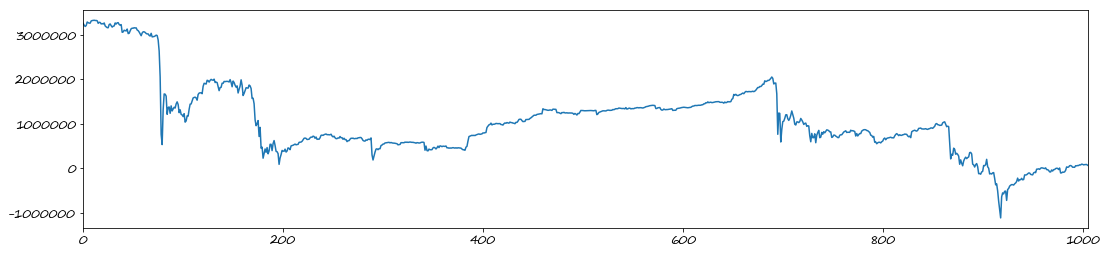

In [11]:
data['pvt'].plot()

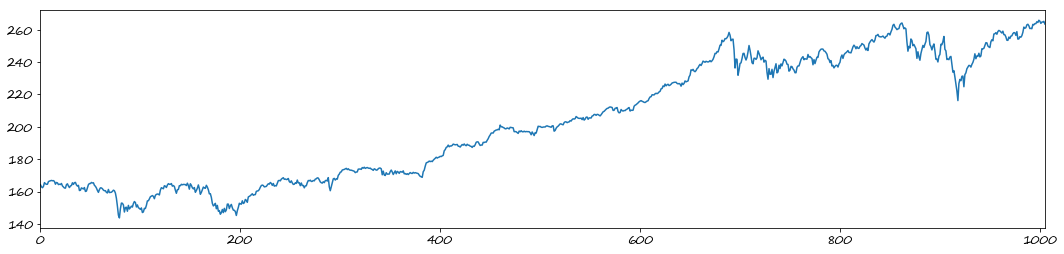

In [12]:
data['close'].plot()

[Python TA-Lib](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[pandas-statistics](https://pythonprogramming.net/pandas-statistics-correlation-tables-how-to/)  
[量價關係分析](https://kknews.cc/zh-tw/other/x2zpk4r.html)  
[股市技術分析利器之TA-Lib（一）](https://kknews.cc/zh-tw/other/pyyvkjz.html)  
[stock_market_indicators](https://github.com/voice32/stock_market_indicators/blob/master/indicators.py)  
[most-volatile-sectors](https://www.investopedia.com/financial-edge/0712/the-8-most-volatile-sectors.aspx)  
[4-volatile-industries](https://www.timothysykes.com/blog/4-volatile-industries-and-some-common-events/)  
[What-sector-of-the-stock-market-is-the-least-volatile](https://www.quora.com/What-sector-of-the-stock-market-is-the-least-volatile)  
[bar-chart-annotations](https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)  

In [13]:
df = pd.read_csv('data0.csv')
#df[['Close','Volume']].plot(secondary_y = ['Volume'])